In [ ]:
# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Library
import sys
import os

# Add the parent directory to sys.path so 'src' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

### Load Dataset

In [4]:
from src.data_processing import load_data
df = load_data("D:\Data Rafdhi\Programming\Programming Project (Git)\XGboost-Optimizer-WholesaleCustomers\data\wholesale-customers.csv")

Data processing module loaded successfully.
Data loaded successfully from D:\Data Rafdhi\Programming\Programming Project (Git)\XGboost-Optimizer-WholesaleCustomers\data\wholesale-customers.csv


### Declare Feature and Target

In [5]:
from src.data_engineering import declare_features
X, y = declare_features(df, "Channel")

Data engineering module loaded successfully.
Features: ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
Target: Channel


- We can see that the y label contain values as 1 and 2. 

- We will need to convert it into 0 and 1 for further analysis. 

### Convert Label Target

In [6]:
from src.data_engineering import convert_labels
convert_labels(y, 2, 0)

Now, we will convert the dataset into an optimized data structure called **Dmatrix** that XGBoost supports and gives it acclaimed performance and efficiency gains. 

In [9]:
from src.data_engineering import define_dmatrix
df_dmatrix = define_dmatrix(X, y)

Data engineering module loaded successfully.


### Split Data

In [12]:
from src.data_engineering import split_data
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

Training data shape: (352, 7), (352,)
Testing data shape: (88, 7), (88,)


### Find Best Parameters with GridSearch CV

In [51]:
from src.xgboost_model import find_best_param
best_params = find_best_param(X_train, y_train)

XGBoost module loaded successfully.
Fitting 5 folds for each of 4374 candidates, totalling 21870 fits
Best parameters found: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 1.0}
Best score: 0.9346881287726359


c:\Users\Asus\miniconda3\envs\machine-learning\lib\site-packages\xgboost\training.py:183: UserWarning: [01:00:46] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Train Model with Best Parameters

In [52]:
from src.xgboost_model import train_model
model = train_model(X_train, y_train, **best_params)

c:\Users\Asus\miniconda3\envs\machine-learning\lib\site-packages\xgboost\training.py:183: UserWarning: [01:00:46] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Predict Test Data

In [57]:
from src.xgboost_model import predict
y_pred = predict(model, X_test)

Evaluate module loaded successfully.


### Evaluate Model for Test Data

In [63]:
from src.evaluate_model import accuracy, plot_confusion_matrix, plot_roc_auc
accuracy(y_test, y_pred)

Accuracy: 90.91 %


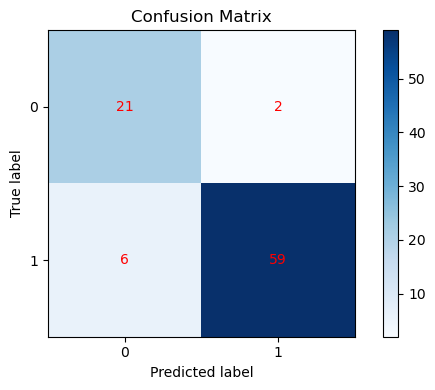

In [65]:
plot_confusion_matrix(y_test, y_pred)

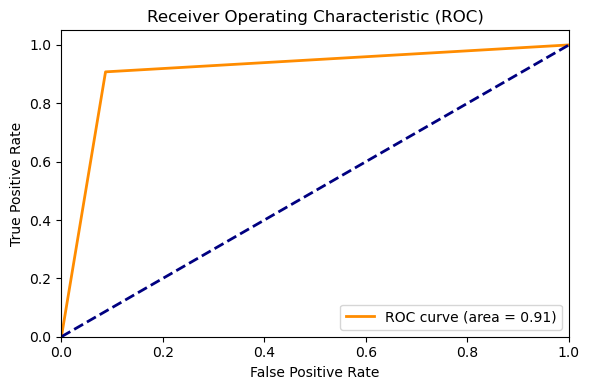

In [66]:
plot_roc_auc(y_test, y_pred)

### Feature Importance

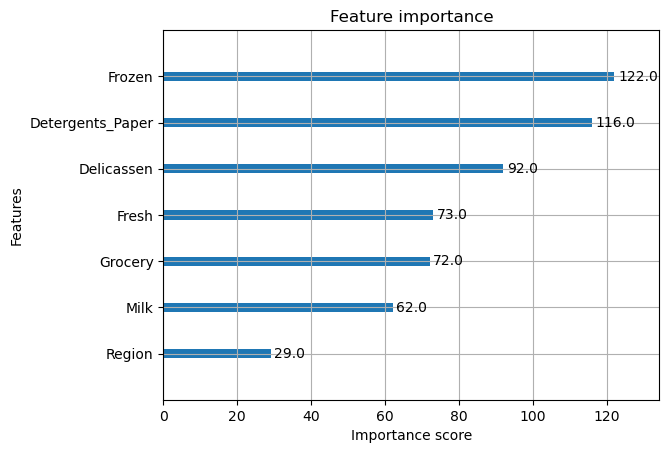

<Figure size 1600x1200 with 0 Axes>

In [67]:
from src.evaluate_model import plot_feature_importance
plot_feature_importance(model)

### Save Model

In [68]:
from src.evaluate_model import save_model
save_model(model, "xgboost_model.json")

Model saved to xgboost_model.json
